# Gaussian Distribution

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

## Univariate Guassian

The PDF for the univariate guassian distribution is given by:

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

where:
- $\mu$ is the mean of the distribution
- $\sigma^2$ is the variance of the distribution

In [2]:
def univariate_guassian_pdf(x, mu, sigma2):
    coeff = 1.0 / np.sqrt(2.0 * np.pi * sigma2)
    exponent = np.exp(-((x - mu) ** 2) / (2.0 * sigma2))
    return coeff * exponent

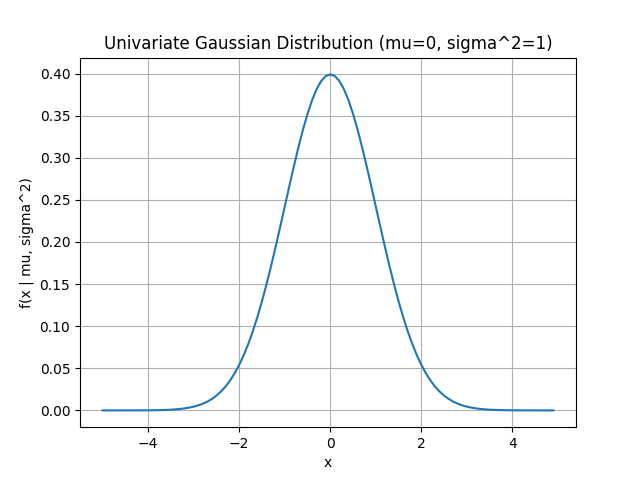

In [3]:
pdfs = univariate_guassian_pdf(np.arange(-5, 5, 0.1), 0.0, 1.0)

plt.plot(np.arange(-5, 5, 0.1), pdfs)
plt.title('Univariate Gaussian Distribution (mu=0, sigma^2=1)')
plt.xlabel('x')
plt.ylabel('f(x | mu, sigma^2)')
plt.grid(True)
plt.show()

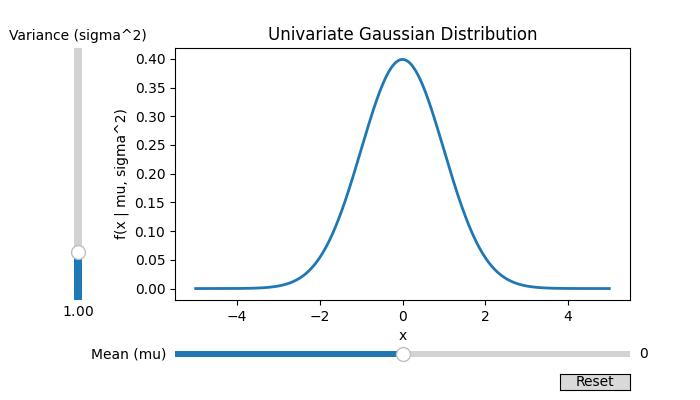

In [4]:

# lets mess with the mean and variance to see its effect
from matplotlib.widgets import Button, Slider

init_mu = 0.0
init_sigma2 = 1.0

x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots(figsize=(7, 4))
line, = ax.plot(x, univariate_guassian_pdf(x, init_mu, init_sigma2), lw=2)
ax.set_title('Univariate Gaussian Distribution')
ax.set_xlabel('x')
ax.set_ylabel('f(x | mu, sigma^2)')
fig.subplots_adjust(left=0.25, bottom=0.25)

ax_mu = fig.add_axes([0.25, 0.1, 0.65, 0.03])
mu_slider = Slider(
    ax=ax_mu,
    label='Mean (mu)',
    valmin=-5.0,
    valmax=5.0,
    valinit=init_mu,
)

ax_sigma2 = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
sigma2_slider = Slider(
    ax=ax_sigma2,
    label='Variance (sigma^2)',
    valmin=0.05,
    valmax=5.0,
    valinit=init_sigma2,
    orientation='vertical',
)


def update(_):
    mu = mu_slider.val
    sigma2 = sigma2_slider.val
    line.set_ydata(univariate_guassian_pdf(x, mu, sigma2))
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

mu_slider.on_changed(update)
sigma2_slider.on_changed(update)

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(_):
    mu_slider.reset()
    sigma2_slider.reset()

button.on_clicked(reset)

plt.show()

## Multivariate Guassian

The PDF for the multivariate guassian distribution is the same as the univariate but in higher dimensions:

$$
f(x | \mu, \Sigma) = \frac{1}{(2 \pi)^{k/2} |\Sigma|^{1/2}} e^{-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$

where:
- $\mu$ is the mean vector of the distribution
- $\Sigma$ is the covariance matrix of the distribution

### Covariance Matrix

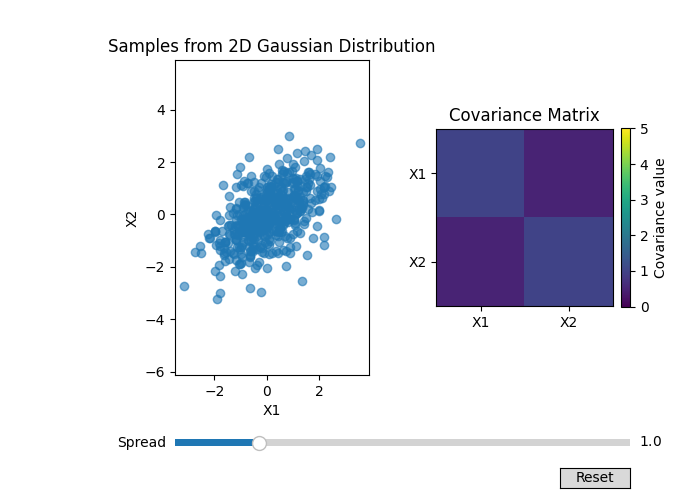

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
# lets make a scatter plot of random samples from a 2D guassian distribution, and visulaise a heatmap of teh covariance matrix

DIMENSIONS = 2
SAMPLES = 500
SPREAD = 1.0

mean = np.zeros(DIMENSIONS)
base_cov = np.array([[1.0, 0.5], [0.5, 1.0]])

# initial state
spread = SPREAD
cov = base_cov * spread
samples = np.random.multivariate_normal(mean, cov, SAMPLES)

fig, (ax_scatter, ax_heat) = plt.subplots(1, 2, figsize=(7, 5))
fig.subplots_adjust(left=0.25, bottom=0.25, wspace=0.35)

scatter = ax_scatter.scatter(samples[:, 0], samples[:, 1], alpha=0.6)
ax_scatter.set_title('Samples from 2D Gaussian Distribution')
ax_scatter.set_xlabel('X1')
ax_scatter.set_ylabel('X2')
ax_scatter.axis('equal')

vmin, vmax = 0.0, float(np.max(base_cov) * 5.0)
im = ax_heat.imshow(cov, cmap='viridis', vmin=vmin, vmax=vmax)
ax_heat.set_title('Covariance Matrix')
ax_heat.set_xticks([0, 1])
ax_heat.set_yticks([0, 1])
ax_heat.set_xticklabels(['X1', 'X2'])
ax_heat.set_yticklabels(['X1', 'X2'])
cb = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cb.set_label('Covariance value')

ax_spread = fig.add_axes([0.25, 0.1, 0.65, 0.03])
spread_slider = Slider(
    ax=ax_spread,
    label='Spread',
    valmin=0.1,
    valmax=5.0,
    valinit=SPREAD,
)

def update(_):
    spread = spread_slider.val
    cov = base_cov * spread
    samples = np.random.multivariate_normal(mean, cov, SAMPLES)
    scatter.set_offsets(samples)
    im.set_data(cov)
    ax_scatter.relim()
    ax_scatter.autoscale_view()
    fig.canvas.draw_idle()

spread_slider.on_changed(update)
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(_):
    spread_slider.reset()

button.on_clicked(reset)

plt.show()

### Multivariate Guassian (again)

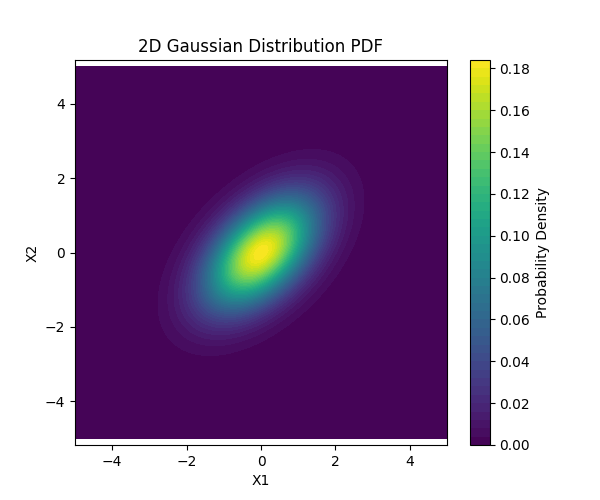

In [6]:
def multivariate_guassian_pdf(x, mean, cov):
    k = len(mean)
    coeff = 1.0 / np.sqrt((2.0 * np.pi) ** k * np.linalg.det(cov))
    diff = x - mean
    # einsum for efficient computation of the exponent (https://stackoverflow.com/questions/26089893/understanding-numpys-einsum)
    exponent = np.exp(-0.5 * np.einsum('...i,ij,...j->...', diff, np.linalg.inv(cov), diff))
    return coeff * exponent

# lets plot the pdf of the 2D guassian distribution
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
pos = np.dstack((X1, X2))
Z = multivariate_guassian_pdf(pos, mean, base_cov)
plt.figure(figsize=(6, 5))
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('2D Gaussian Distribution PDF')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

### 3D graph time

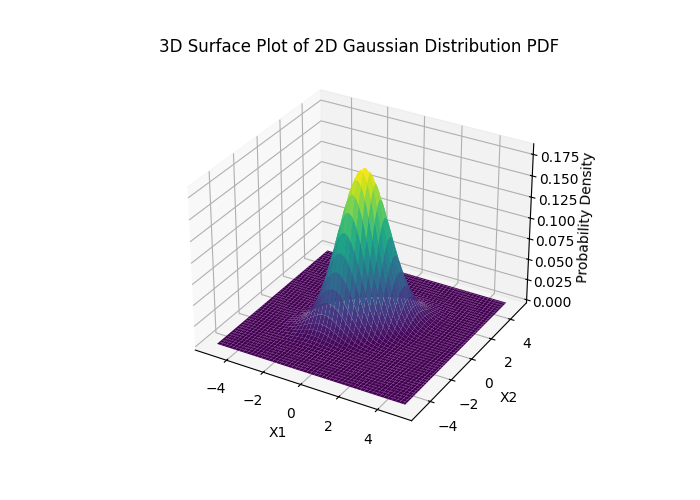

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot of 2D Gaussian Distribution PDF')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
plt.show()